In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris=dataset.load_iris()
X=iris['data'][:,(2,3)]
y=(iris['target']==0).astype(np.int)

In [3]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

In [4]:
perceptron=Perceptron()
perceptron.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_predict=perceptron.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

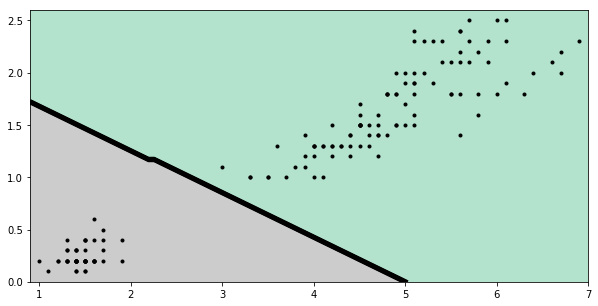

In [6]:
plt.figure(figsize=(10,5))
mins=X.min(axis=0)-0.1
maxs=X.max(axis=0)+0.1
x1=np.linspace(mins[0],maxs[0],100)
x2=np.linspace(mins[1],maxs[1],100)
xx,yy=np.meshgrid(x1,x2)
zz=np.c_[xx.ravel(),yy.ravel()]
Z=perceptron.predict(zz).reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel2)
plt.contour(xx,yy,Z,colors='k',linewidths=3)
plt.plot(X[:,0],X[:,1],"k.")
plt.show()

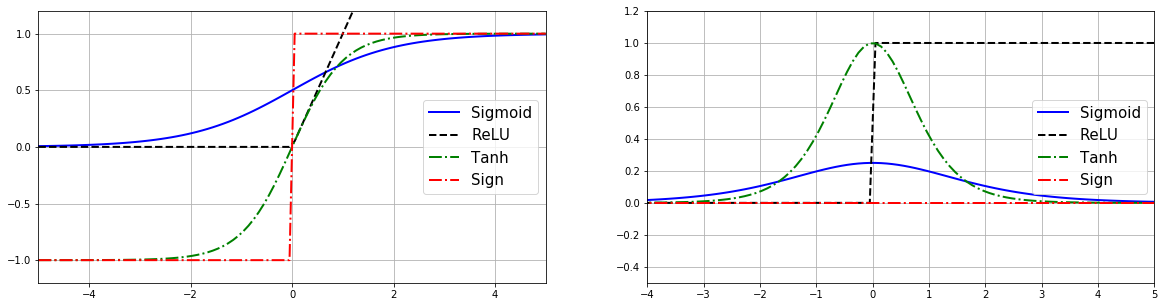

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f,z, eps=0.000001):
    return (f(z+eps)-f(z-eps))/(2*eps)

z=np.linspace(-5,5,100)

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(z,sigmoid(z),'b-',linewidth=2,label="Sigmoid")
#rectified linear unit function
plt.plot(z,relu(z),"k--",linewidth=2, label="ReLU")
plt.plot(z,np.tanh(z),"g-.",linewidth=2, label="Tanh")
plt.plot(z,np.sign(z),"r-.",linewidth=2,label="Sign")
plt.grid(True)
plt.axis([-5,5,-1.2,1.2])
plt.legend(loc="center right", fontsize=15)

plt.subplot(122)
plt.plot(z,derivative(sigmoid,z),'b-',linewidth=2,label="Sigmoid")
#rectified linear unit function
plt.plot(z,derivative(relu,z),"k--",linewidth=2, label="ReLU")
plt.plot(z,derivative(np.tanh,z),"g-.",linewidth=2, label="Tanh")
plt.plot(z,derivative(np.sign,z),"r-.",linewidth=2,label="Sign")
plt.grid(True)
plt.axis([-4.0,5,-0.5,1.2])
plt.legend(loc="center right", fontsize=15)

plt.show()

In [10]:
import tensorflow as tf
from tensorflow import keras

ImportError: Could not find 'nvcuda.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Typically it is installed in 'C:\Windows\System32'. If it is not present, ensure that you have a CUDA-capable GPU with the correct driver installed.